In [76]:
from PIL import Image
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt

from captcha.image import ImageCaptcha

In [68]:
def vertical_filter(image):
    img_arr = np.array(image, dtype=np.float32)
    
    height, width = img_arr.shape
    for h in range(height):
        for w in range(width - 1):
            img_arr[h, w] = abs(img_arr[h, w] - img_arr[h, w + 1])
    
    return img_arr


def horizontal_filter(image):
    img_arr = np.array(image, dtype=np.float32)
    
    height, width = img_arr.shape
    for h in range(height - 1):
        for w in range(width):
            img_arr[h, w] = abs(img_arr[h, w] - img_arr[h + 1, w])
    
    return img_arr


def plot_filters(image, show=False, ret=False):
    vf = vertical_filter(image)
    hf = horizontal_filter(image)
    
    if show:
        Image.fromarray(vf).show()
        Image.fromarray(hf).show()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.imshow(vf)
    ax2.imshow(hf)
    ax1.set_title("Vertical Filter")
    ax2.set_title("Horizontal Filter")

    fig.set_size_inches(9, 4)
    plt.tight_layout()
    
    if ret:
        return vf, hf

def color_scaler(img):
    arr = np.array(img)
    height, width = arr.shape
    for h in range(height):
        for w in range(width):
            arr[h, w] = 255 if arr[h, w] > 150 else 0
    
    return arr

In [92]:
filepath = "../data/raw/AFXKES.png"
captcha_img = Image.open(filepath).convert("L")
captcha_arr = np.array(captcha_img)

In [93]:
scaled_arr = color_scaler(captcha_img)
scaled_img = Image.fromarray(scaled_arr)

In [94]:
scaled_img.show()

In [95]:
vf = vertical_filter(scaled_arr)
hf = horizontal_filter(vf)

In [96]:
Image.fromarray(vf).show()

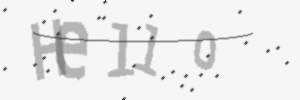

In [85]:
captcha = ImageCaptcha(width=300, height=100)
temp = captcha.generate_image("Hello").convert("L")
temp